In [13]:
%reload_kedro

# Load the unannotated data.
clips = catalog.load("tfrecord_unannotated_no_wheel")

2022-05-23 12:02:07,782 - kedro.extras.extensions.ipython - INFO - No path argument was provided. Using: /home/daniel/git/cotton_flower_mot
2022-05-23 12:02:08,012 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2022-05-23 12:02:08,203 - kedro.io.core - WARNING - `version` attribute removed from data set configuration since it is a reserved word and cannot be directly specified
2022-05-23 12:02:08,204 - kedro.io.core - WARNING - `version` attribute removed from data set configuration since it is a reserved word and cannot be directly specified
2022-05-23 12:02:08,205 - kedro.io.core - WARNING - `version` attribute removed from data set configuration since it is a reserved word and cannot be directly specified
2022-05-23 12:02:08,206 - kedro.io.core - WARNING - `version` attribute removed from data set configuration since it is a reserved word and cannot be directly specified
2022-05-23 12:02:08,251 - kedro.extras.extension

In [14]:
from tqdm import tqdm

# Extract the actual datasets.
datasets = []
for loader in tqdm(clips.values(), desc="Loading unannotated clips"):
    datasets.append(loader())

Loading unannotated clips: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3214/3214 [00:14<00:00, 222.05it/s]


In [15]:
from cotton_flower_mot.pipelines.dataset_io import rot_net_inputs_and_targets_from_dataset
from cotton_flower_mot.pipelines.config import ModelConfig

# Create the preprocessing pipeline.
config = ModelConfig(image_input_shape=(100, 100, 3), frame_input_shape=(1080, 1920, 3), detection_model_input_shape=(540, 960, 3),
                     rot_net_input_shape=(720, 720, 3), num_appearance_features=128, num_gcn_channels=128, sinkhorn_lambda=10.0, num_reduction_stages=2,
                     detection_sigma=3, nominal_detection_size=(0.052, 0.093))
preprocessed = rot_net_inputs_and_targets_from_dataset(datasets, config=config)

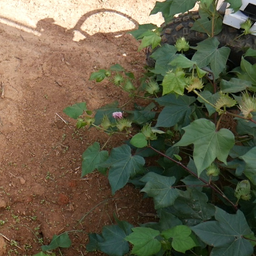

tf.Tensor(0, shape=(), dtype=int32)


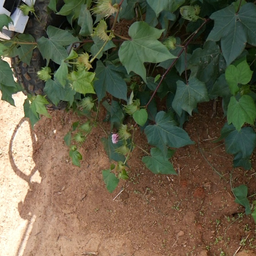

tf.Tensor(1, shape=(), dtype=int32)


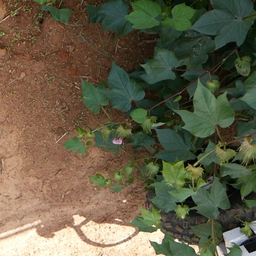

tf.Tensor(2, shape=(), dtype=int32)


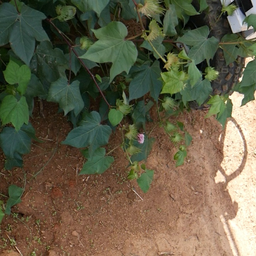

tf.Tensor(3, shape=(), dtype=int32)


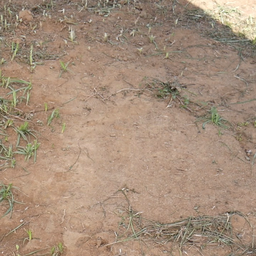

tf.Tensor(0, shape=(), dtype=int32)


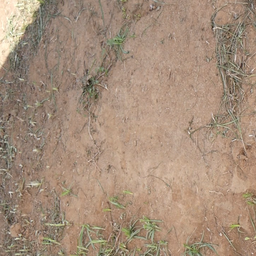

tf.Tensor(1, shape=(), dtype=int32)


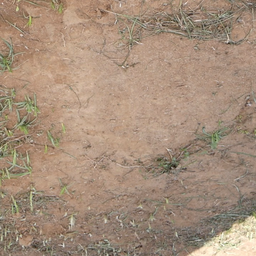

tf.Tensor(2, shape=(), dtype=int32)


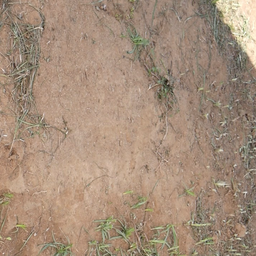

tf.Tensor(3, shape=(), dtype=int32)


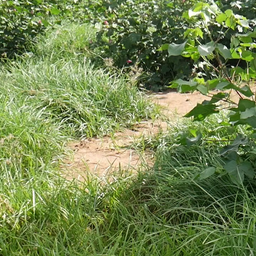

tf.Tensor(0, shape=(), dtype=int32)


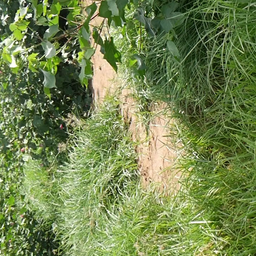

tf.Tensor(1, shape=(), dtype=int32)


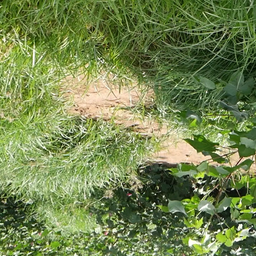

tf.Tensor(2, shape=(), dtype=int32)


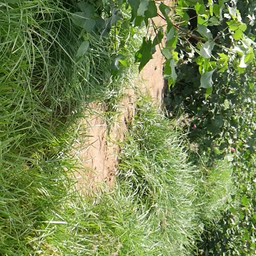

tf.Tensor(3, shape=(), dtype=int32)


In [17]:
import itertools
from PIL import Image
from IPython.display import display

# Sample the data.
for inputs, targets in itertools.islice(preprocessed.unbatch(), 12):
    # Convert BGR to RGB,
    image = Image.fromarray(inputs["image"].numpy()[..., ::-1])
    display(image.resize((256, 256), Image.Resampling.LANCZOS))
    
    print(targets["predictions"])